## Clustering : K means & Hierarchical Clustering :

In [1]:
# Importing the required libraries: 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Extracting the dataset: 
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### EDA:

In [4]:
# Checking the shape of the dataset: 
df.shape

(200, 5)

In [5]:
# Checking if the dataset has any nan vales: 
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
# Dropping unwanted columns: 
df = df.drop(columns=['CustomerID'])
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [7]:
# Alloting dummy variables to categorical data: 
df = pd.get_dummies(df)
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0


In [8]:
# Escaping the dummy variable trap: 
df = df.drop(columns=['Genre_Female'])
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


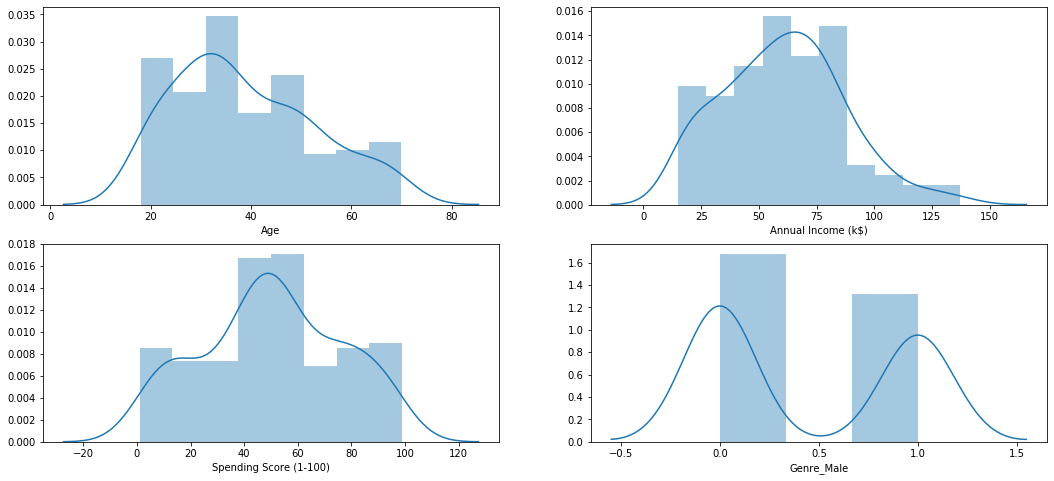

In [10]:
# Visual representation of data representation: 
f, axes = plt.subplots(2,2,figsize = (18,8))
col = 0
for i in range(0,2):
    for j in range(0,2):
        sns.distplot(df.iloc[:,col], ax = axes[i,j])
        col = col + 1
plt.show()

### K Means Clustering: 

#### Calculating the number of clusters: 

In [30]:
# Preparing the dataset: 
# Eliminating other cols for visualizing purposes:
x = df.iloc[:,[1,2]].values

In [31]:
# Using within cluster sum of square to arrive at optimal number of clusters: 
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

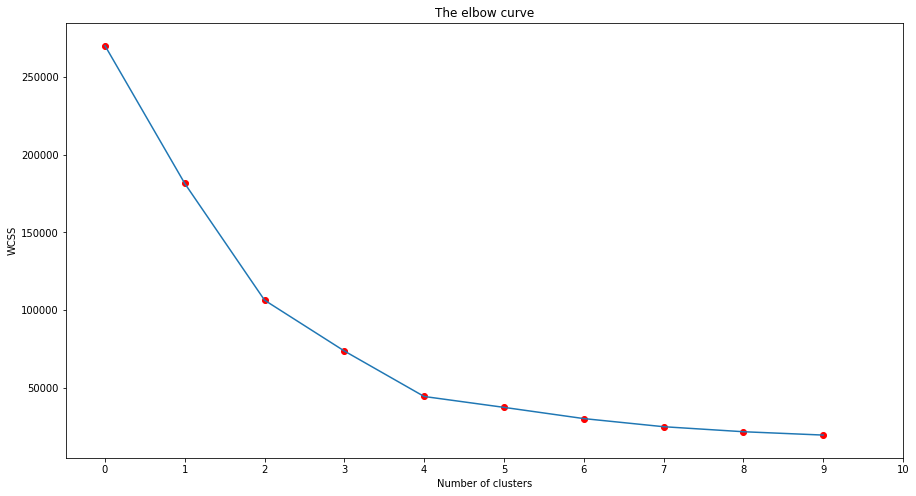

In [32]:
# Plotting the elbow curve: 
plt.figure(figsize=(15,8))
plt.plot(range(0,10), wcss)
plt.scatter(range(0,10), wcss, color = 'red')
plt.xticks(range(0,11))
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('The elbow curve')
plt.show()

In [20]:
# The optimal number of cluster can be selected as 5: 

#### Builing the model: 

In [47]:
kmeans = KMeans(n_clusters=5, init = 'k-means++')
y_pred = kmeans.fit_predict(x)

#### Visualizing the clusters: 

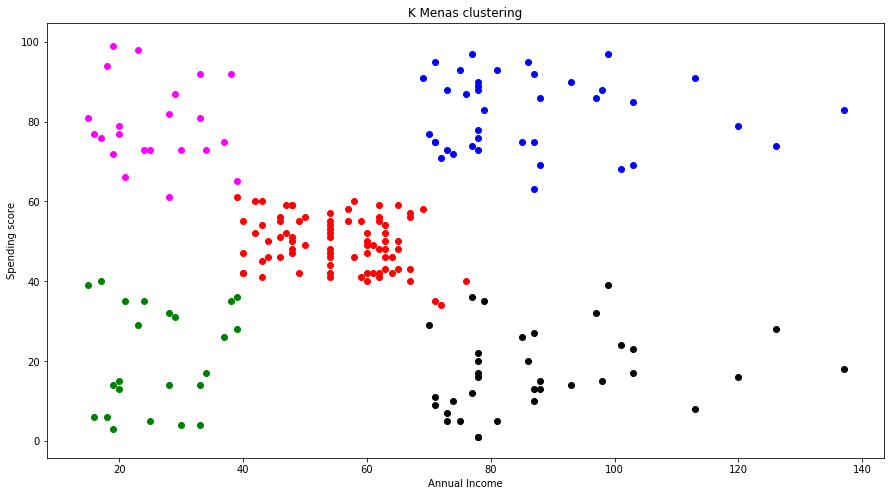

In [48]:
plt.figure(figsize=(15,8))
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], color = 'red', label = 'cluster 1')
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], color = 'black', label = 'cluster 2' )
plt.scatter(x[y_pred == 2, 0], x[y_pred == 2, 1], color = 'blue', label = 'cluster 3' )
plt.scatter(x[y_pred == 3, 0], x[y_pred == 3, 1], color = 'green', label = 'cluster 4' )
plt.scatter(x[y_pred == 4, 0], x[y_pred == 4, 1], color = 'magenta', label = 'cluster 5' )
plt.xlabel('Annual Income')
plt.ylabel('Spending score')
plt.title('K Menas clustering')
plt.show()

### Hierarchical Clustering

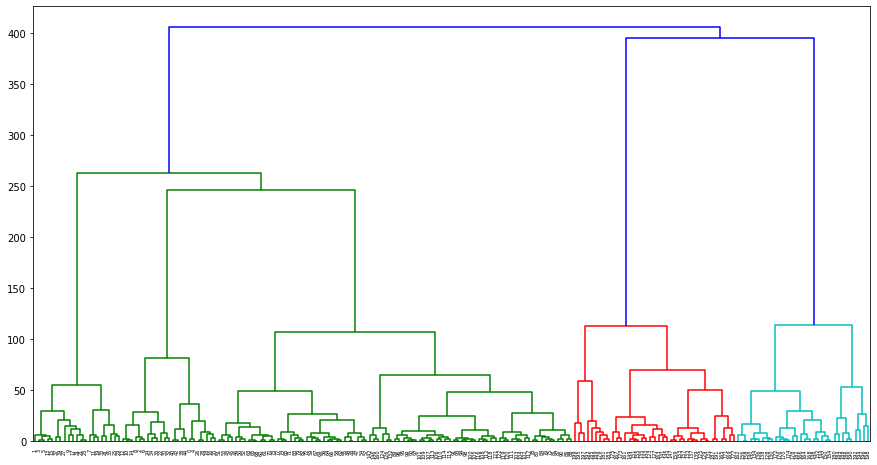

In [39]:
# Finding the optimal number of clusters suing Dendrogram:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15,8))
plot = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.show()

#### Building the model: 


In [44]:
# Optimal number of clusters: 5
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5)

# Making the prediction: 
y_pred_hc = hc.fit_predict(x)

In [45]:
# Predicted clusters: 
y_pred_hc 

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

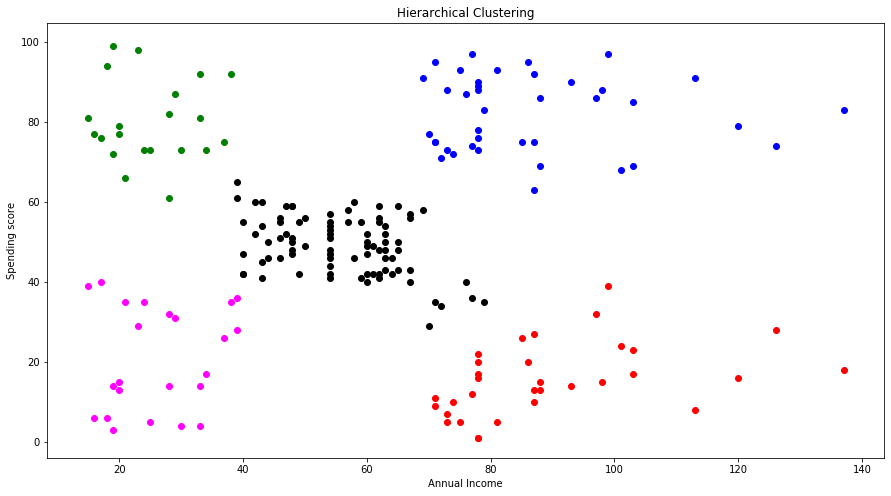

In [49]:
# Visualizing the predicted clusters: 
plt.figure(figsize=(15,8))
plt.scatter(x[y_pred_hc == 0, 0], x[y_pred_hc == 0, 1], color = 'red', label = 'cluster 1')
plt.scatter(x[y_pred_hc == 1, 0], x[y_pred_hc == 1, 1], color = 'black', label = 'cluster 2' )
plt.scatter(x[y_pred_hc == 2, 0], x[y_pred_hc == 2, 1], color = 'blue', label = 'cluster 3' )
plt.scatter(x[y_pred_hc == 3, 0], x[y_pred_hc == 3, 1], color = 'green', label = 'cluster 4' )
plt.scatter(x[y_pred_hc == 4, 0], x[y_pred_hc == 4, 1], color = 'magenta', label = 'cluster 5' )
plt.xlabel('Annual Income')
plt.ylabel('Spending score')
plt.title('Hierarchical Clustering')
plt.show()